# Assignment 1

In this assignment, you will explore a dataset. 

You can choose a dataset to follow this assignment from the list of available datasets in https://pytorch.org/vision/stable/datasets.html . Given that you will be asked to extract RGB descriptros, you should select 3-channel images.

Comment your code and indicate what the different instructions are doing and what you are showing and printing. 
When printing figures do not forget about the title, x and y labels. The font size should be matching the text size of the text in your report. 
Do not forget to add legends to the plots. 

In [47]:
# Load needed packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# include packages you will be using

### Exercise: Load data

Load the dataset. 
Print how many samples, classes, and shape of an image. 

In [48]:
import torchvision
from torchvision.transforms import ToTensor

dataset = torchvision.datasets.cifar.CIFAR10(root="./",transform=ToTensor(), download=True, train=True)

Files already downloaded and verified


In [49]:
nSamples = dataset.data.shape[0]
nClasses = len(dataset.classes)
imgShape = dataset.data[0, :, :, :].shape

print("Number of samples: ", nSamples)
print("Number of classes: ", nClasses)
print("Shape of an image: ", imgShape)

Number of samples:  50000
Number of classes:  10
Shape of an image:  (32, 32, 3)


### Exercise: Quantify dataset

1) Print the number of samples per category.

2) Plot these number using a bar plot.

Reflection: Are you working with a balanced dataset? unbalanced dataset? Are there majoritarian classes? Do you think this will affect the later analysis and training of your models?

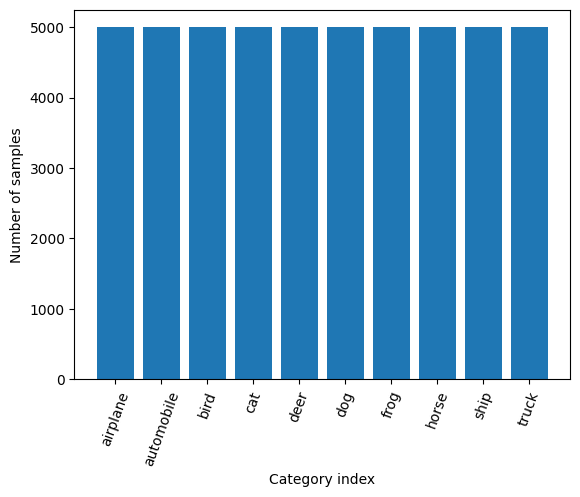

In [50]:
unique, counts = np.unique(dataset.targets, return_counts=True)

plt.bar(np.array(dataset.classes)[unique], counts)
plt.ylabel("Number of samples")
plt.xlabel("Category index")
plt.xticks(rotation=70)
plt.show()

### Exercise: Visualize images

Create a figure with n x 4 images, one per category of your dataset. The value of n will depend on the number of categories of your selected dataset.
As the title of each of the images in your figure, indicate the category it belongs to.

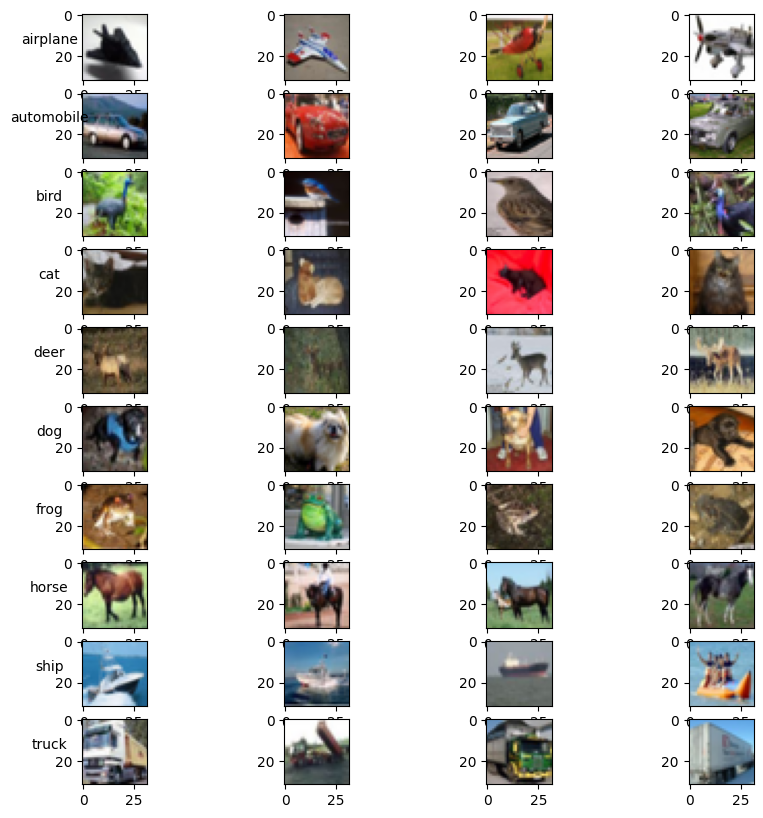

In [51]:
# your code here
fig, axs = plt.subplots(nClasses, 4, figsize=(10, 10))

for n in np.arange(nClasses):
    for i in range(4):
        # img = np.transpose(dataset.data[dataset.targets == n][i], (1, 2, 0))
        if i == 0:
            axs[n, i].set_ylabel(dataset.classes[n], rotation=0)
        axs[n, i].imshow(dataset.data[dataset.targets == n][i])
        # axs[n, i].axis('off')

|### Exercise: RGB feature extraction

Extract RGB values from the image as three lists. 8 values per channel. To do so, you can compute the histogram of each channel with 8 bits, and then concatenate those values. The resulting descriptor will have 24 values (8 values per channel). This feature vector is the descriptor of an images in your dataset.

In [52]:
# your code here
descriptor = np.zeros((nSamples, 24))

for i in range(nSamples):
    # img = np.transpose(dataset.data[i], (1, 2, 0))
    img = dataset.data[i]

    r = img[:, :, 0].flatten()
    g = img[:, :, 1].flatten()
    b = img[:, :, 2].flatten()

    r_hist, _ = np.histogram(r, bins=8)
    g_hist, _ = np.histogram(g, bins=8)
    b_hist, _ = np.histogram(b, bins=8)

    descriptor[i, :] = np.concatenate((r_hist, g_hist, b_hist))

# descriptor = descriptor.tolist()
# descriptor = [tuple(x) for x in descriptor]

In [53]:
descriptor

array([[  5.,  28.,  64., ...,  30.,  20.,  14.],
       [ 47., 125., 212., ..., 123.,  87.,  92.],
       [134., 315., 111., ...,  23.,  28., 282.],
       ...,
       [218., 362., 117., ...,  46.,  62., 235.],
       [ 28.,  26.,  54., ..., 197., 180., 310.],
       [ 23.,  60., 147., ...,  99.,  53., 132.]])

### Exercise: Correlation among samples of the different categories

After extracting the RGB descriptors, you have now descriptors and labels (each category represents a label). 

Compute the inter-class and intra-class variability of your dataset. 

Hints:

- For intra-class correlation you can use the implementation from the pingouin package,
https://pingouin-stats.org/generated/pingouin.intraclass_corr.html

- For inter-class correlation you can compute the variability among the descriptors of the samples that belong to a category.

In [54]:
# your code here
import pingouin as pg

df = pd.DataFrame(np.hstack((descriptor, np.zeros((50000, 1)), np.reshape(dataset.targets, (nSamples, 1)))))

columns = []
for i in range(24):
    columns.append("x_" + str(i + 1))
columns.append("image")
columns.append("y")
df.columns = columns

for i in range(10):
    df.loc[df['y'] == i, "image"] = np.arange(5000)

icc = pg.intraclass_corr(df, targets="y", raters="image", ratings="x_12")


/Users/kjwdamme/.conda/envs/assignmentsDS/lib/python3.10/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sserror = grp.apply(lambda x: (x - x.mean()) ** 2).sum()
/Users/kjwdamme/.conda/envs/assignmentsDS/lib/python3.10/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this wa

In [55]:
icc

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.020356,104.895814,9,49990,1.511252e-195,"[0.01, 0.07]"
1,ICC2,Single random raters,0.020357,105.102050,9,44991,9.859868e-196,"[0.01, 0.07]"
2,ICC3,Single fixed raters,0.020396,105.102050,9,44991,9.859868e-196,"[0.01, 0.07]"
3,ICC1k,Average raters absolute,0.990467,104.895814,9,49990,1.511252e-195,"[0.98, 1.0]"
4,ICC2k,Average random raters,0.990467,105.102050,9,44991,9.859868e-196,"[0.98, 1.0]"
5,ICC3k,Average fixed raters,0.990485,105.102050,9,44991,9.859868e-196,"[0.98, 1.0]"


In [56]:
np.max(descriptor, axis=0).shape

(24,)

In [57]:
# Inter class correlation
# A measure for variability is the standard deviation.

avg_variances = []
avg_ranges = []
for i in range(10):
    idx = np.array(dataset.targets) == i
    data = descriptor[idx]

    variances = np.std(data, axis=0)
    ranges = np.max(data, axis=0) - np.min(data, axis=0)

    avg_var = np.sum(variances)/len(variances)
    avg_range = np.sum(ranges)/len(ranges)

    avg_variances.append(avg_var)
    avg_ranges.append(avg_range)

np.stack([avg_variances, avg_ranges], axis=1)

array([[135.84611016, 938.66666667],
       [ 82.91831431, 677.58333333],
       [129.01092129, 905.625     ],
       [ 93.98890844, 747.20833333],
       [ 99.62287317, 728.91666667],
       [ 91.92898374, 701.91666667],
       [ 95.38236028, 735.29166667],
       [ 89.76411538, 670.33333333],
       [102.29592398, 799.16666667],
       [ 77.3039441 , 619.58333333]])

The Silhouette score is used to assess the performance of using unsupervised machine learning (clustering). We can also use it here to assess the compactness of the extracted descriptors.

You can use the function available in Sklearn;

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [58]:
from sklearn.metrics import silhouette_score

silhouette_score(descriptor, dataset.targets)

-0.0770694945921322

Reflection: Do these metrics help you assess the degree of similarity among the samples of a category? what about among categories? What can you deduce?



In [59]:
"""
The silhouette score is fairly close to zero, meaning that the clusters are overlapping. This indicates to me that there is a similarity among the different categories. It is however hard to say whether there is any similarity between the samples of a category, because the clusters are apparently overlapping, but we do not know how compact these clusters are.

The inter class correlation does not tell us much. We know the standard deviation but we are not sure whether this value is high or low. It can be compared to the range, to give us a little understanding of this. However, this range can be highly influenced by a single outlier, which makes the comparison useless.

The intra class correlation, so ICC1, ICC2, and ICC3 are all very close to zero. This means that there is a low level of similarity among the samples itself.


"""

'\nThe silhouette score is fairly close to zero, meaning that the clusters are overlapping. This indicates to me that there is a similarity among the different categories. It is however hard to say whether there is any similarity between the samples of a category, because the clusters are apparently overlapping, but we do not know how compact these clusters are.\n\nThe inter class correlation does not tell us very much. We know the standard deviation but we are not sure whether this value is high or low. It can be compared to the range, to give us a little understanding of this. However, this range can be highly influenced by a single outlier, which makes the comparison useless.\n\nThe intra class correlation, so ICC1, ICC2, and ICC3 are all very close to zero. This means that there is a low level of similarity among the samples itself. \n\n\n'

### Exercise: Dimensionality reduction for visualization 

We can visualize 2- or 3-dimensional spaces. 
For this reason, you need to reduce dimensionality. 

In this exercise you are asked to use PCA for reducing dimensionality.

Link to function to apply PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Create the following two figures:

1) Rely on the first 2 principal components to plot the samples of your dataset. 

2) Rely on the first 3 principal components to create a 3D plot.


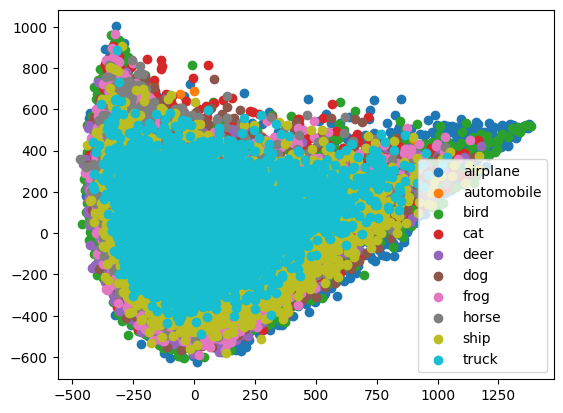

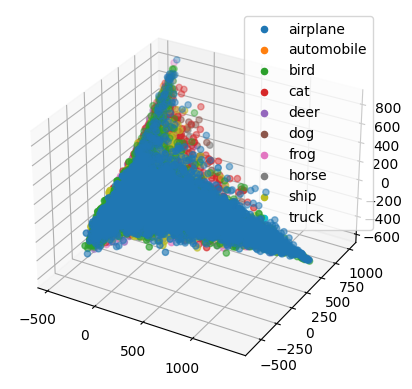

In [60]:
# your code here
# %matplotlib notebook
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
pca3 = PCA(n_components=3)

transformed2 = pca2.fit_transform(descriptor)
transformed3 = pca3.fit_transform(descriptor)


for label in np.arange(10):
    idx = dataset.targets == label
    plt.scatter(transformed2[idx, 0], transformed2[idx, 1])

plt.legend(dataset.classes)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for label in np.arange(10):
    idx = dataset.targets == label
    ax.scatter(transformed3[idx, 0], transformed3[idx, 1], transformed3[idx, 2])

ax.legend(dataset.classes)
plt.show()


### Exercise: Reflection

Reflect on the following questions. Your answers can be implemented in the report for the practical.

    - Will you obtain the same visualisation in the feature space for different extracted features?
    
    - Are the classes distinguishable on the feature space when relaying on PCA over RGB?
    
    - What other visualization could you include to better describe your data?

In [61]:
#

"""
Will you obtain the same visualisation in the feature space for different extracted features?
    No, when using another method to extract other types of features from the images we will have a completely different dataset that might even have a different number of dimensions. Therefore, the visualization should look quite different.

Are the classes distinguishable on the feature space when relaying on PCA over RGB?
    The classes do not look distinguishable on the 2D and 3D plot. All the different classes seem to be grouped together in a single blob and I cannot think of a model that could reliably separate the different classes.

What other visualization could you include to better describe your data?
    A visualization I already included in the plots that was not specifically asked for was giving each class a different color. A whole different way of visualizing the dataset is to combine the different histograms into a boxplot. A different box plot could be created for each class.
"""

'\nWill you obtain the same visualisation in the feature space for different extracted features?\n    No, when using another method to extract other types of features from the images we will have a completely different dataset that might even have a different number of dimensions. Therefore, the visualization should look quite different.\n\nAre the classes distinguishable on the feature space when relaying on PCA over RGB?\n    The classes do not look distinguishable on the 2D and 3D plot. All the different classes seem to be grouped together in a single blob and I cannot think of a model that could reliably separate the different classes.\n\nWhat other visualization could you include to better describe your data?\n    A visualization I already included in the plots that was not specifically asked for was giving each class a different color. A whole different way of visualizing the dataset is to combine the different histograms into a boxplot. A different box plot could be created for 

### [Optional] Exercise: Repeat experiments with different image descriptros

e.g. 
- Harris Corner Detection

- Shi-Tomasi Corner Detector and Good Features to Track

- Scale-Invariant Feature Transform (SIFT)

- Speeded-up robust features (SURF)

- Features from Accelerated Segment Test (FAST)

- Blob Detectors With LoG, DoG, and DoH

If you have OpenCV installed you can follow this examples,
https://automaticaddison.com/image-feature-detection-description-and-matching-in-opencv/

When using Scikit-image,
https://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=hog